In [10]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from datetime import datetime

In [11]:
# This turns all the axes white in all the matplotlib plots. Comment this out if you dont want that
COLOR = 'white'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR

In [12]:
df_transaction = pd.read_csv('./datasets/ieee-fraud-detection/train_transaction.csv')
df_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Separate fraud and non-fraud data
is_Fraud1 = df.loc[df['isFraud'] == 1]
is_Fraud0 = df.loc[df['isFraud'] == 0]

# Undersample non-fraud data to match fraud data size
is_Fraud0_undersampled = is_Fraud0.sample(n=len(is_Fraud1), random_state=42)

# Combine fraud and undersampled non-fraud data
undersampled_df = pd.concat([is_Fraud1, is_Fraud0_undersampled])

# Shuffle dataframe rows
undersampled_df = undersampled_df.sample(frac=1, random_state=42)
undersampled_df.head()


,isFraud,TransactionDT,TransactionAmt,ProductCD,P_emaildomain,R_emaildomain,card4
586133,1,15692470,31.355,C,hotmail.com,hotmail.com,visa
458335,0,11739927,48.815,C,hotmail.com,hotmail.com,mastercard
52543,0,1224878,62.381,C,hotmail.com,hotmail.com,visa
265515,1,6418626,20.905,C,gmail.com,gmail.com,mastercard
545426,0,14401409,49.614,C,hotmail.com,hotmail.com,mastercard


In [14]:
# Neural Network
features = ['isFraud', 'TransactionDT',
            'TransactionAmt','ProductCD', 'P_emaildomain','R_emaildomain', 'card4']

df = df_transaction[features]
df.head()

target = 'isFraud'
cat = ['TransactionDT','ProductCD', 'P_emaildomain','R_emaildomain', 'card4']
num = ['TransactionAmt']

df = df.dropna()
y = df[target].values

x_cat = df.filter(items = cat).values 
x_num = df.filter(items = num).values

labelencoder_X = LabelEncoder()
for i in range(len(cat)): 
    x_cat[:, i] = labelencoder_X.fit_transform(x_cat[:, i])
    
X = np.concatenate((x_cat, x_num), axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

X_train = np.asarray(X_train).astype('float32') 
y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
X_val = np.asarray(X_val).astype('float32')
y_val = np.asarray(y_val).astype('float32').reshape((-1,1))

X_train.shape, y_train.shape

model = tf.keras.Sequential() 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)) 
model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 
model.fit(X_train, y_train, epochs=10)

val_loss, val_acc = model.evaluate(X_val, y_val)
print(val_loss, val_acc)

# For same number of layers, adding the extra feature of card4 does not really enhance the predictive prowess of our model.

Epoch 1/10
2521/2521 [==============================] - 2s 605us/step - loss: 111.9030 - accuracy: 0.8369
Epoch 2/10
2521/2521 [==============================] - 1s 591us/step - loss: 32.3951 - accuracy: 0.8413
Epoch 3/10
2521/2521 [==============================] - 2s 603us/step - loss: 10.2662 - accuracy: 0.8442
Epoch 4/10
2521/2521 [==============================] - 2s 609us/step - loss: 4.0354 - accuracy: 0.8494
Epoch 5/10
2521/2521 [==============================] - 2s 597us/step - loss: 1.4683 - accuracy: 0.8617
Epoch 6/10
2521/2521 [==============================] - 2s 612us/step - loss: 0.5451 - accuracy: 0.8927
Epoch 7/10
2521/2521 [==============================] - 1s 585us/step - loss: 0.3326 - accuracy: 0.9143
Epoch 8/10
2521/2521 [==============================] - 1s 587us/step - loss: 0.2954 - accuracy: 0.9163
Epoch 9/10
2521/2521 [==============================] - 1s 595us/step - loss: 0.3223 - accuracy: 0.9158
Epoch 10/10
631/631 [==============================] - 0s 35

631/631 [==============================] - 0s 299us/step
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96     18559
         1.0       0.00      0.00      0.00      1605

    accuracy                           0.92     20164
   macro avg       0.46      0.50      0.48     20164
weighted avg       0.85      0.92      0.88     20164



/Users/saefurukawa/opt/anaconda3/envs/pai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saefurukawa/opt/anaconda3/envs/pai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/saefurukawa/opt/anaconda3/envs/pai/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

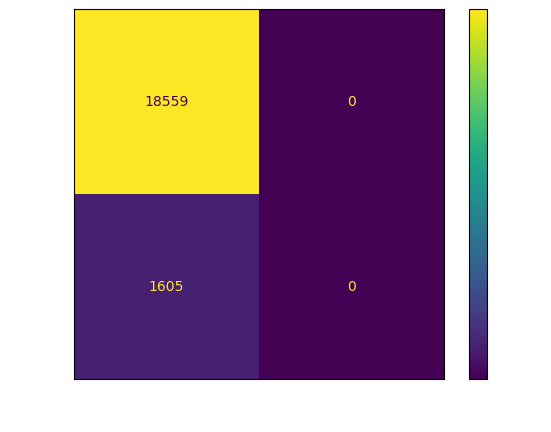

In [15]:
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix

# Predict on validation set
y_pred = model.predict(X_val)
y_pred = np.round(y_pred)


print(classification_report(y_val, y_pred))
conf_mat = confusion_matrix(y_val, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = conf_mat, display_labels = [False, True])
cm_display.plot()
plt.show()